In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install numpy
!pip install pillow
!pip install --upgrade tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importing Tensorflow and testing its version

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.12.0


Renaming train directory

In [ ]:
import os
import re

# Define the path to your dataset
base_dir = '/content/drive/MyDrive/ArtClassification/train'

# Function to clean and format the new file name
def format_file_name(file_name):
    # Remove special characters and spaces except hyphen and period
    cleaned_name = re.sub(r'[^\w\s.-]', '', file_name)
    # Replace spaces with underscores
    formatted_name = cleaned_name.replace(' ', '_')
    return formatted_name

# Iterate through the subdirectories in the train directory
for class_name in os.listdir(base_dir):
    class_dir = os.path.join(base_dir, class_name)
    if os.path.isdir(class_dir):
        # Rename the files in the subdirectory
        for i, file_name in enumerate(os.listdir(class_dir)):
            _, extension = os.path.splitext(file_name)
            new_file_name = f"{class_name}_{i}{extension}"
            new_file_name = format_file_name(new_file_name)

            # Add '.jpg' extension if the file doesn't have any extension
            if not extension:
                new_file_name += '.jpg'

            old_file_path = os.path.join(class_dir, file_name)
            new_file_path = os.path.join(class_dir, new_file_name)
            os.rename(old_file_path, new_file_path)


Renaming test dir

In [ ]:
import os
import re

# Define the path to dataset
base_dir = '/content/drive/MyDrive/ArtClassification/test'

# Function to clean and format the new file name
def format_file_name(file_name):
    # Remove special characters and spaces
    cleaned_name = re.sub(r'[^\w\s]', '', file_name)
    # Replace spaces with underscores
    formatted_name = cleaned_name.replace(' ', '_')
    return formatted_name

# Iterate through the subdirectories in the train directory
for class_name in os.listdir(base_dir):
    class_dir = os.path.join(base_dir, class_name)
    if os.path.isdir(class_dir):
        # Rename the files in the subdirectory
        for i, file_name in enumerate(os.listdir(class_dir)):
            _, extension = os.path.splitext(file_name)
            new_file_name = f"{class_name}_{i}{extension}"
            new_file_name = format_file_name(new_file_name)
            
            # Add '.jpg' extension if the file doesn't have any extension
            if not extension:
                new_file_name += '.jpg'

            old_file_path = os.path.join(class_dir, file_name)
            new_file_path = os.path.join(class_dir, new_file_name)
            os.rename(old_file_path, new_file_path)

Renaming validation directory

In [ ]:
import os
import re

# Define the path to dataset
base_dir = '/content/drive/MyDrive/ArtClassification/validation'

# Function to clean and format the new file name
def format_file_name(file_name):
    # Remove special characters and spaces
    cleaned_name = re.sub(r'[^\w\s]', '', file_name)
    # Replace spaces with underscores
    formatted_name = cleaned_name.replace(' ', '_')
    return formatted_name

# Iterates through the subdirectories in the train directory
for class_name in os.listdir(base_dir):
    class_dir = os.path.join(base_dir, class_name)
    if os.path.isdir(class_dir):
        # Rename the files in the subdirectory
        for i, file_name in enumerate(os.listdir(class_dir)):
            _, extension = os.path.splitext(file_name)
            new_file_name = f"{class_name}_{i}{extension}"
            new_file_name = format_file_name(new_file_name)
            
            # Add '.jpg' extension if the file doesn't have any extension
            if not extension:
                new_file_name += '.jpg'

            old_file_path = os.path.join(class_dir, file_name)
            new_file_path = os.path.join(class_dir, new_file_name)
            os.rename(old_file_path, new_file_path)


Pre processing and defining dir

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator

# Define the paths to your dataset
base_dir = '/content/drive/MyDrive/ArtClassification'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Define the image size for resizing
target_size = (224, 224)

# Define the batch size for training and testing
batch_size = 32

# Data augmentation and normalization
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=20,  # Randomly rotate images
    width_shift_range=0.2,  # Randomly shift images horizontally
    height_shift_range=0.2,  # Randomly shift images vertically
    shear_range=0.2,  # Randomly apply shearing transformation
    zoom_range=0.2,  # Randomly zoom in and out
    horizontal_flip=True  # Randomly flip images horizontally
)

# Load and preprocess the training data with data augmentation
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,  # Shuffle the training data
    subset='training'  # Specify subset as training data
)

# Load and preprocess the validation data
validation_generator = datagen.flow_from_directory(
    validation_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Do not shuffle the validation data
)

# Load and preprocess the testing data
test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale pixel values for testing
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Do not shuffle the testing data
)

# Confirm the number of classes and number of images for each set
num_classes = len(train_generator.class_indices)
print("Number of classes:", num_classes)
print("Number of training images:", train_generator.samples)
print("Number of validation images:", validation_generator.samples)
print("Number of testing images:", test_generator.samples)


Found 3535 images belonging to 5 classes.
Found 250 images belonging to 5 classes.
Found 420 images belonging to 5 classes.
Number of classes: 5
Number of training images: 3535
Number of validation images: 250
Number of testing images: 420


creating the layers

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.applications import ResNet50
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from sklearn.metrics import confusion_matrix, accuracy_score
import os

# Create an instance of the ResNet model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Add a custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model to the training data
epochs = 30
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    batch_size=batch_size
)

# Evaluate the trained model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Perform predictions on the test data
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred = tf.argmax(y_pred, axis=1)

# Check if each prediction was correct
correct_predictions = (y_true == y_pred)

# Print the correct predictions
for i in range(len(correct_predictions)):
    print(f"Sample {i+1}: {'Correct' if correct_predictions[i] else 'Incorrect'}")

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# Compute accuracy
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

Epoch 1/30
111/111 [==============================] - 882s 8s/step - loss: 1.5185 - accuracy: 0.3369 - val_loss: 1.4209 - val_accuracy: 0.3920
Epoch 2/30
111/111 [==============================] - 846s 8s/step - loss: 1.4019 - accuracy: 0.4116 - val_loss: 1.3192 - val_accuracy: 0.4440
Epoch 3/30
111/111 [==============================] - 843s 8s/step - loss: 1.3624 - accuracy: 0.4447 - val_loss: 1.2666 - val_accuracy: 0.5160
Epoch 4/30
 86/111 [======================>.......] - ETA: 2:47 - loss: 1.3072 - accuracy: 0.4804

Visualing the evaluation

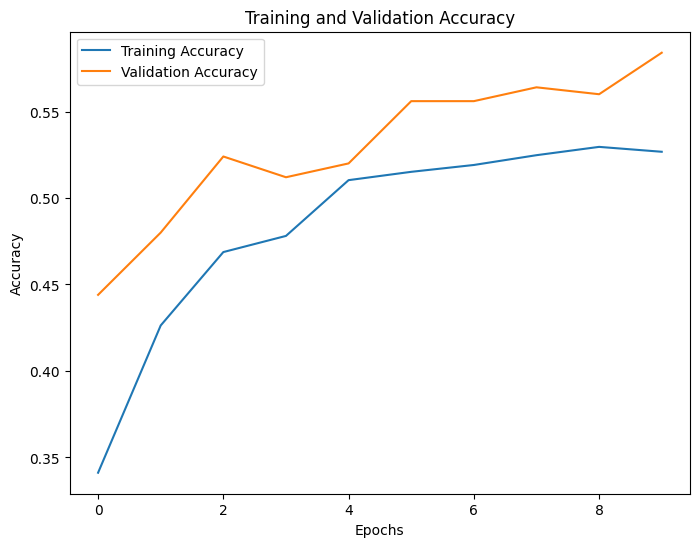

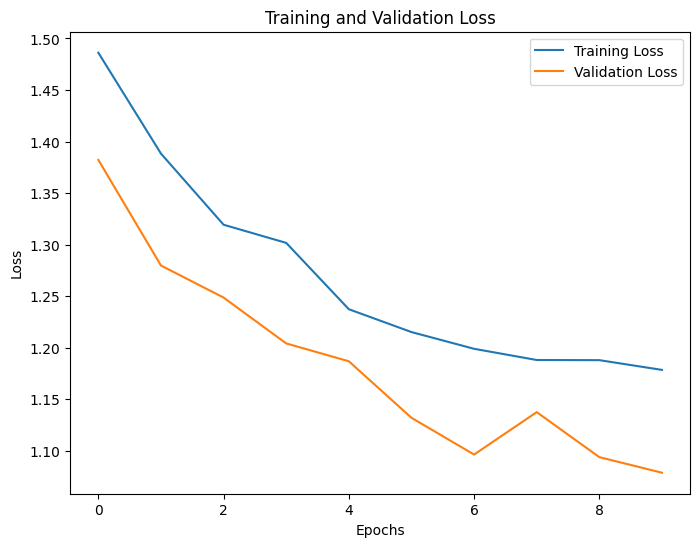

In [ ]:
import matplotlib.pyplot as plt

# Get the history of training/validation accuracy and loss
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot accuracy curves
plt.figure(figsize=(8, 6))
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss curves
plt.figure(figsize=(8, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Visualizing the confusion metric

14/14 [==============================] - 76s 5s/step


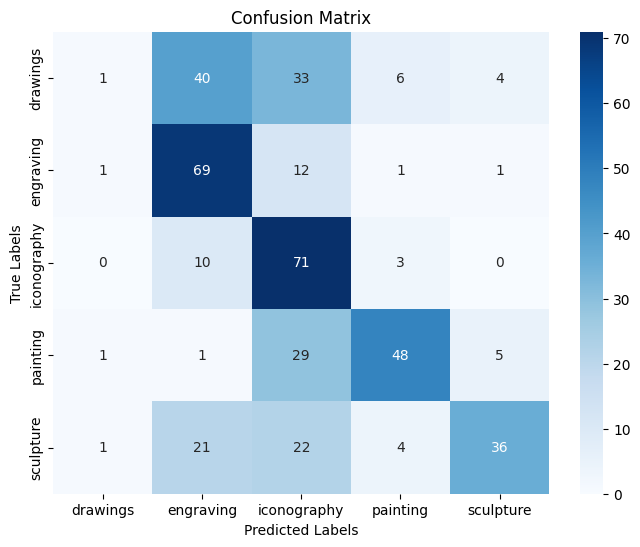

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get the true labels and predicted labels
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Get the class labels
class_labels = list(test_generator.class_indices.keys())

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Saving the model

In [ ]:
import os
from tensorflow import keras

# Get the current working directory
current_directory = os.getcwd()

# Create a folder path for the ArtClassification folder
art_classification_folder = os.path.join(current_directory, 'ArtClassification')

# Create the ArtClassification folder if it doesn't exist
if not os.path.exists(art_classification_folder):
    os.makedirs(art_classification_folder)

# Specify the file path for saving the model
model_file_path = os.path.join(art_classification_folder, 'art_classifier_model.h5')

# Save the trained model
model.save(model_file_path)
print("Model saved successfully.")


Model saved successfully.


In [ ]:
import os
from tensorflow import keras


# Specify the directory path for saving the model
art_classification_folder = '/content/drive/MyDrive/ArtClassification'

# Create the ArtClassification folder if it doesn't exist
if not os.path.exists(art_classification_folder):
    os.makedirs(art_classification_folder)

# Specify the file path for saving the model
model_file_path = os.path.join(art_classification_folder, 'art_classifier_model.h5')

# Save the trained model
model.save(model_file_path)

# Print the directory where the model is saved
print("Model saved in directory:", art_classification_folder)


Model saved in directory: /content/drive/MyDrive/ArtClassification


Downloading weights